This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

1. Learn how to implement scatterplots diagrams 
2. Learn how to calculate covariance and correlation coefficients
3. Understand simple linear regression model in the matrix notation
4. Solve linear regression problems using:
    - [statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)
    - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)
    - [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)
    

### Dataset 

What if we wanted to implement a product like [BBVA Valora](https://www.bbva.es/personas/experiencias/bbva-valora.html)?

Let's start with a realistic (but toy) example. The database we're going to use is the housing [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) database . For each house, we have the following attributes, variables, characteristics or *features*

| Feature | description |
| - |- |
|*id*| house id|
| *date*| date
| *price*| price
| *bedrooms*| # bedrooms
| *bathrooms*| # bathrooms
| *sqtf_living*| living area (squared feet)
| *sqft_lot*| lot (squared feet)
| *floors*| # floors
| *waterfront*| indicates whether the property has access to a lake
| *view*| type of view (ordinal variable)
| *condition*| house condition(ordinal variable)
| *grade*| construction quality (ordinal variable)
| *sqft_above*| above-ground area (squared feet)
| *sqft_basement*| basement area (squared feet)
| *yr_built*| year of construction
| *yr_renovated*| year of renovation
| *zip_code*| zip code
| *lat*| latitude coordinate
| *long*| longitude coordinate
| *sqft_living15*| average living area from the 15 nearest neighbors	
| *sqft_lot15*| average lot living area from the 15 nearest neighbors	

# 0. Load data

In [2]:
# load libraries
import pandas as pd
import numpy as np

#import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
house_data = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\kc_house_data.csv') 

# Remove id and date 
house_data = house_data.drop(['id','date'], axis=1)

# Convert squared feet to squared meters
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# Rename columns
feature_names = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                 'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                 'sqm_living15','sqm_lot15']
house_data.columns = feature_names

# Display dataframe
house_data.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509


# 1. Scatter plots

Scatter plots allow us to display values for two variables from a dataset. There are several ways to do this in Python:

- [Matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
- [Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- [Plotly](https://plotly.com/python/line-and-scatter/)


Let's represent the housing price with respect to another variable.

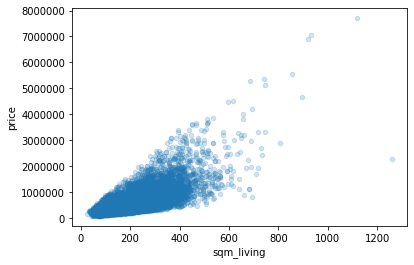

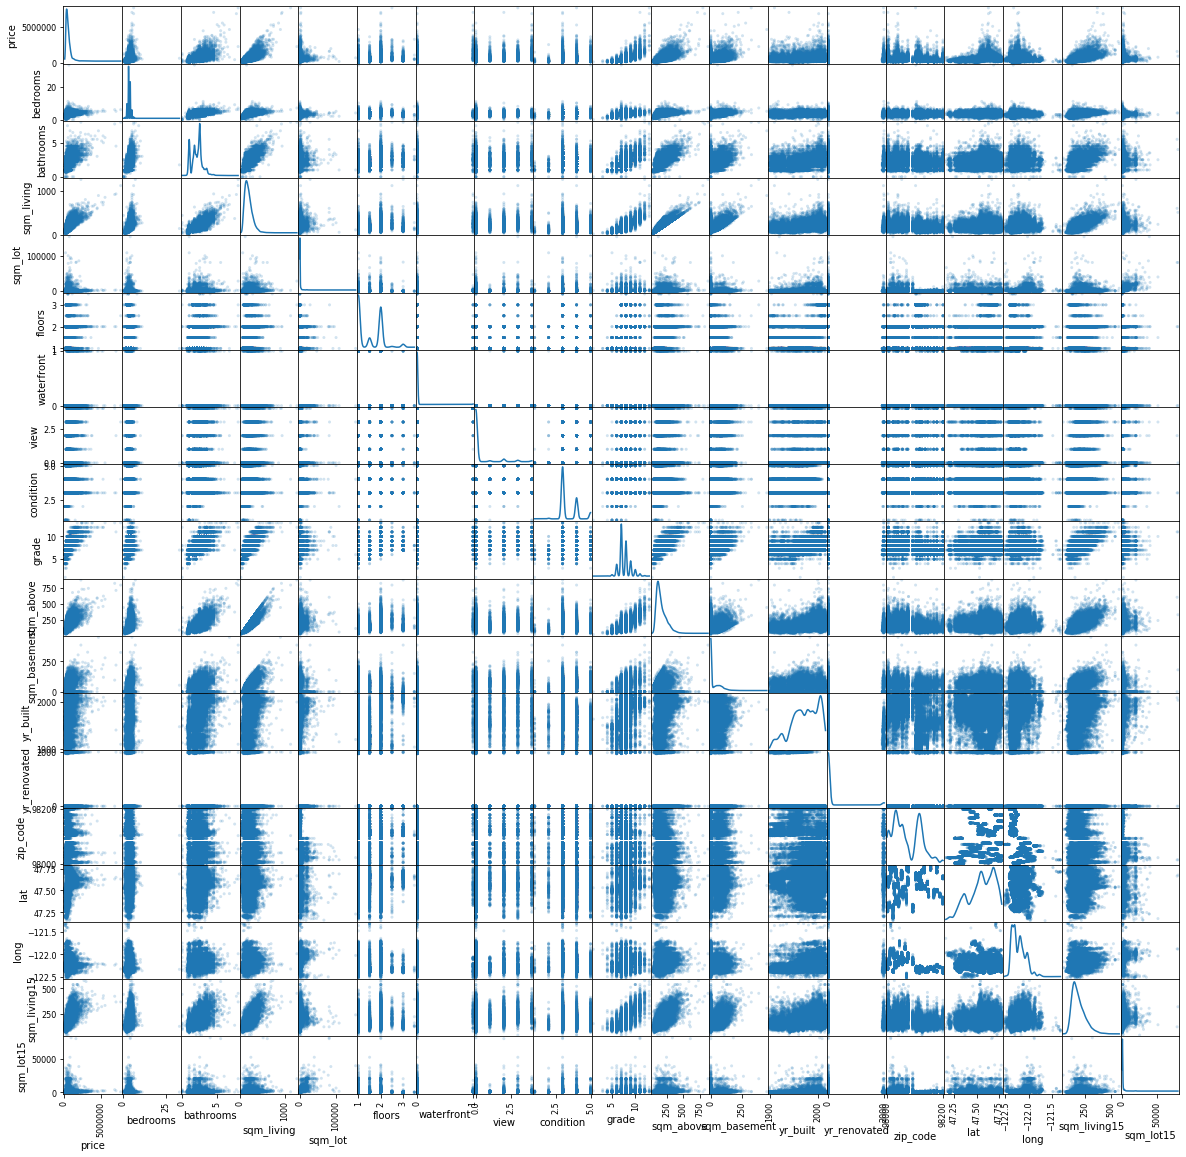

In [5]:
# pandas vs plotly
x_variable = 'sqm_living' # 'sqm_living', 'bedrooms', 'lat', 'grade'

#pandas
house_data.plot.scatter(x=x_variable,y='price',alpha=0.2)
plt.show()

#plotly
#fig = px.scatter(house_data, x=x_variable, y="price",
#                 marginal_y="histogram", marginal_x="histogram",
#                 height=400, template = 'plotly_white')
#fig.show()

# RUN THIS AT HOME
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 2. Covariance and correlation

We can use:

- Pandas
- Numpy
- SciPy Stats

In [6]:
# Option 1: pandas
display(house_data[['price','sqm_living']].cov())
display(house_data[['price','sqm_living']].corr())

,price,sqm_living
price,1.347824e+11,2.199158e+07
sqm_living,2.199158e+07,7.280518e+03


,price,sqm_living
price,1.000000,0.702035
sqm_living,0.702035,1.000000


In [7]:
# Option 2: numpy
x = house_data['sqm_living']
y = house_data['price']
print('Covariance matrix:\n', np.cov(x,y))
print('Correlation matrix:\n',np.corrcoef(x,y))

Covariance matrix:
 [[7.28051798e+03 2.19915832e+07]
 [2.19915832e+07 1.34782378e+11]]
Correlation matrix:
 [[1.         0.70203505]
 [0.70203505 1.        ]]


In [8]:
# Option 3: scipy
from scipy.stats import pearsonr

print('Correlation Coefficient: ', pearsonr(x,y))

Correlation Coefficient:  (0.7020350546118002, 0.0)


### Correlation analysis for the complete dataset

This is just for illustration purposes, do not need to replicate it.

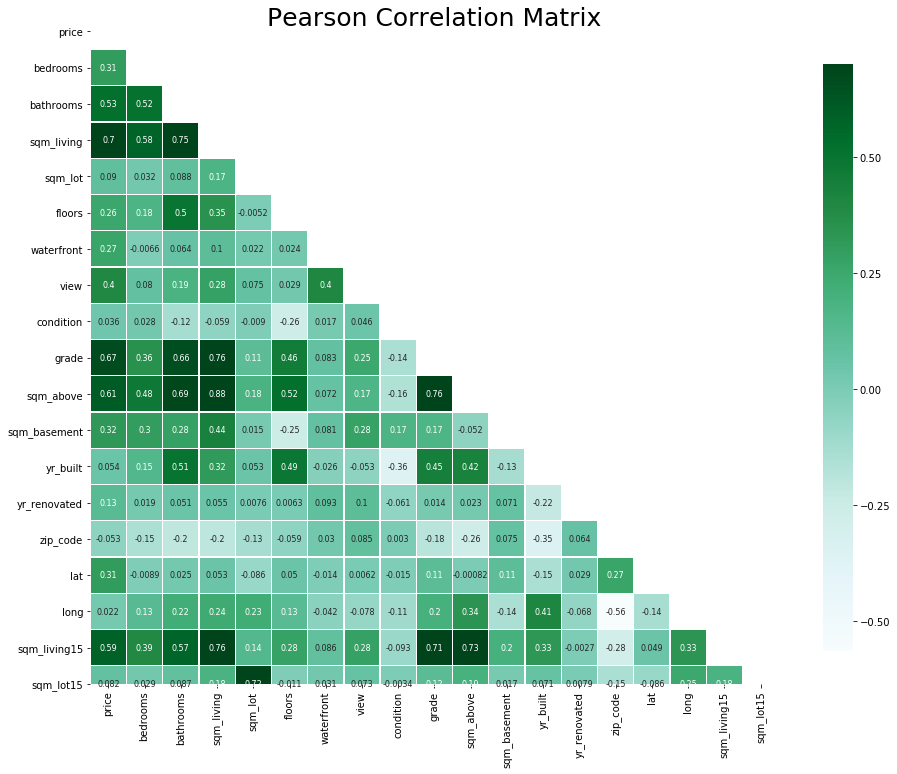

In [9]:
import seaborn as sns

mask = np.zeros_like(house_data[feature_names].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(house_data[feature_names].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# 3. simple linear regression model in the matrix notation

The simple linear regression model assumes that

$$y_i = \beta_0 + \beta_1x_i + u_i,\quad i=1,\ldots,n$$

If we write one equation for each one of the observations, we have

$$
\begin{align}
    y1 & = \beta_0 + \beta_1x_1 + u_1 \\
    y2 & = \beta_0 + \beta_1x_2 + u_2 \\
    \vdots & =  \vdots \\
    y_n & = \beta_0 + \beta_1x_n + u_n 
\end{align}
$$

We can write the preceding equations in matrix form as

$$\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \end{bmatrix} = \begin{bmatrix} 
    \beta_0 + \beta_1x_1 \\
    \beta_0 + \beta_1x_2 \\
    \vdots \\
    \beta_0 + \beta_1x_n 
\end{bmatrix} + \begin{bmatrix} 
    u_1 \\
    u_2 \\
    \vdots \\
    u_n \\
\end{bmatrix}
$$


And splitting the parameters $\beta$ from the variables $x_i$ 


$$\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \end{bmatrix} = \begin{bmatrix} 
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n 
\end{bmatrix}\begin{bmatrix} 
    \beta_0 \\
    \beta_1 \\
\end{bmatrix} + \begin{bmatrix} 
    u_1 \\
    u_2 \\
    \vdots \\
    u_n \\
\end{bmatrix}
$$

And this relationship can be written as

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta}+\mathbf{u}$$

where:

- $\mathbf{y}$: reponse vector
- $\mathbf{X} = [\mathbf{1} + \mathbf{x}]$: explanatory variables matrix
- $\boldsymbol{\beta}$: vector of parameters
- $\mathbf{u}$: error vector

### Least-squares estimation

It can be [proved](https://en.wikipedia.org/wiki/Ordinary_least_squares) that the vector of parameters can be estimated as 

$$\hat{\boldsymbol{\beta}}= (\mathbf X^{\rm T} \mathbf X )^{-1} \mathbf X^{\rm T} \mathbf y$$

so that 

$$\hat{\mathbf y} =\mathbf X \hat{\boldsymbol{\beta}}$$

In [10]:
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[-43580.74309447]
 [  3020.60694567]]


# 4. Solving a linear regression problem

There are several libraries that allow us to perform ordinary least squares estimates.

- [statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)

## 4.1 Fitting the regression line

That is, estimate the values of $\beta_0$ and $\beta_1$

C:\Users\riul0\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        18:59:35   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqm_living  3020.6069     20.843    144.920      0.000    2979.753    3061.461
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

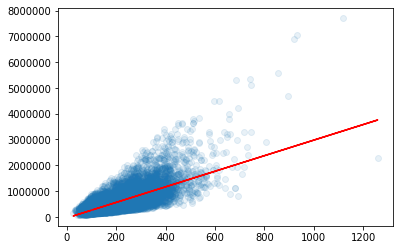

In [11]:
# OPTION 1: statsmodels
import statsmodels.api as sm

x = house_data['sqm_living']
#x = house_data['sqm_living','bedrooms'] Multple linear regresion in order to increment R squared
y = house_data['price']

X     = sm.add_constant(x)
model = sm.OLS(y,X)

results = model.fit()
display(results.summary())

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

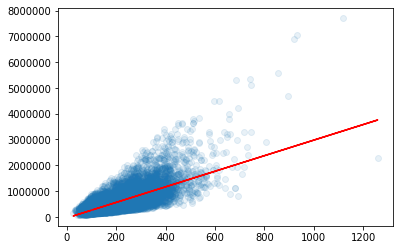

Intercept: 	beta_0 = -43580.74
Slope:		beta_1 = 3020.61


In [12]:
from sklearn.linear_model import LinearRegression

x = house_data['sqm_living'].values.reshape(-1, 1)
y = house_data['price'].values

lr = LinearRegression().fit(x, y)
y_hat = lr.predict(x)

plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

beta0 = lr.intercept_
beta1 = lr.coef_

print('Intercept: \tbeta_0 = %.2f' % beta0)
print('Slope:\t\tbeta_1 = %.2f' % beta1)

In [13]:
from scipy.stats import linregress

x = house_data['sqm_living']
y = house_data['price']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope, intercept, r_value**2, p_value, std_err)

3020.60694566559 -43580.74309447396 0.4928532179037926 0.0 20.843220544762744


## 4.2 Prediction

What would be the estimated price for a `sqm_living` value of 800m$^2$?

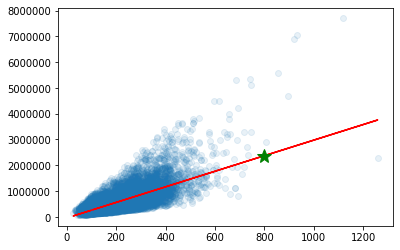

The estimated value is 2372904.81


In [14]:
sqm_living = 800
y_800 = results.predict([1, sqm_living])

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.plot(sqm_living,y_800,'g*',markersize = 14)
plt.show()

print('The estimated value is', y_800[0].round(2))

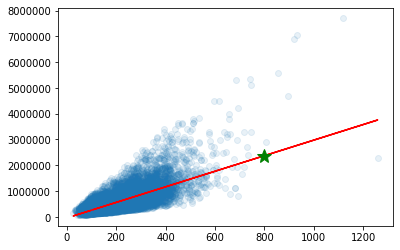

The estimated value is 2372904.81


In [15]:
x_new = np.array([800]).reshape(1, -1)
y_800 = lr.predict(x_new)

plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.plot(x_new,y_800,'g*',markersize=14)
plt.show()

print('The estimated value is', y_800[0].round(2))

# 5. Exercises

All linear regression exercises are very similar. Given two variables $X$ and $Y$ from a dataset, the question to be addressed usually are:

1. Describe the relationship between $X$ and $Y$
2. Calculate the correlation coefficient for $X$ and $Y$ 
3. Do the data meet the conditions required for fitting a least squares line? In addition to the scatterplot,
use the residual plot and histogram to answer this question.
4. Write the equation of the regression line. Interpret the slope and intercept in context
5. Do the data provide strong evidence that an increase/decrease in $X$ is associated with an increase/decrease in $Y$? State the null and alternative hypotheses, report the p-value, and state your conclusion.
6. Calculate R$^2$ and interpret it in context
7. For a value of $x=x_0$, what would be the estimated $\hat{y}_0$ value? Is it reasonable? 

### Exercise 1

Data on US cancer mortality rates for over 3000 counties are available in the dataset `cancer_reg.csv`. Read the dataset into Python and use it to construct a regression model with `target_deathrate` as the response variable and candidate predictors: `povertypercent`, `studypercap`, `medianage`, `pctunemployed16_over`, `pctprivatecoverage`, `pctbachdeg25_over`.

The description of the dataset can be found [here](https://data.world/nrippner/ols-regression-challenge)

<div class="alert alert-block alert-info">
Find the best predictor for <b>target_deathrate</b> taking into account the above considerations
</div>

In [16]:
df = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\cancer_reg.csv',sep=',', decimal = '.', encoding='latin-1')

features = ['target_deathrate','povertypercent','studypercap','medianage',
            'pctunemployed16_over','pctprivatecoverage','pctbachdeg25_over']

cancer_data = df[features]
cancer_data = cancer_data.dropna()
cancer_data.head()

,target_deathrate,povertypercent,studypercap,medianage,pctunemployed16_over,pctprivatecoverage,pctbachdeg25_over
0,164.9,11.2,499.748204,39.3,8.0,75.1,19.6
1,161.3,18.6,23.111234,33.0,7.8,70.2,22.7
2,174.7,14.6,47.560164,45.0,7.0,63.7,16.0
3,194.8,17.1,342.637253,42.8,12.1,58.4,9.3
4,144.4,12.5,0.000000,48.3,4.8,61.6,15.0


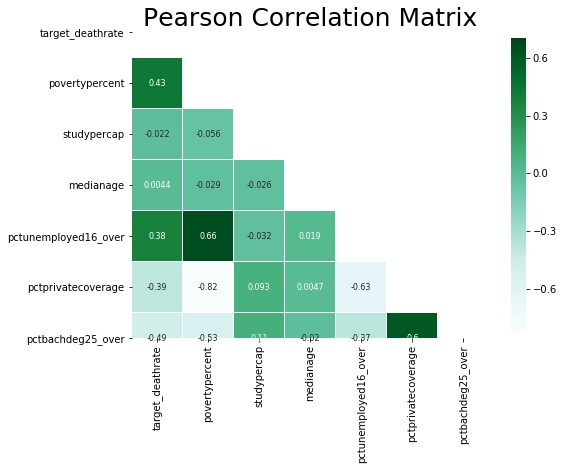

In [17]:
mask = np.zeros_like(cancer_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(8, 6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(cancer_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

#### Visuals

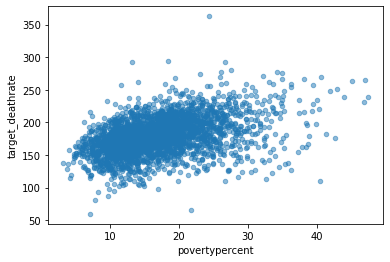

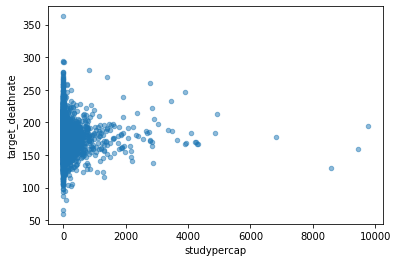

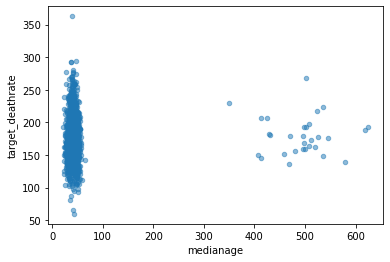

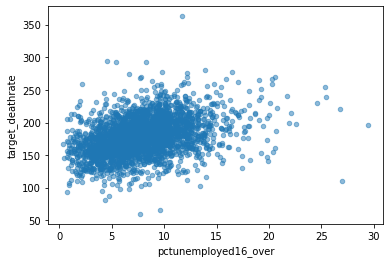

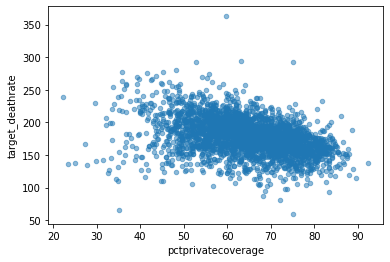

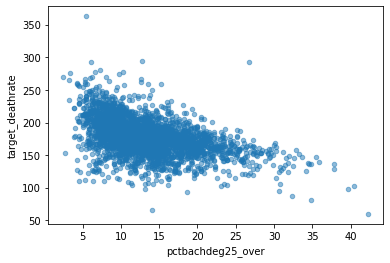

In [85]:
#pandas
x_variables = ['povertypercent', 'studypercap', 'medianage', 'pctunemployed16_over', 'pctprivatecoverage', 'pctbachdeg25_over']

for predictor in x_variables:
    cancer_data.plot.scatter(x=predictor ,y='target_deathrate',alpha=0.5)

    
plt.show()

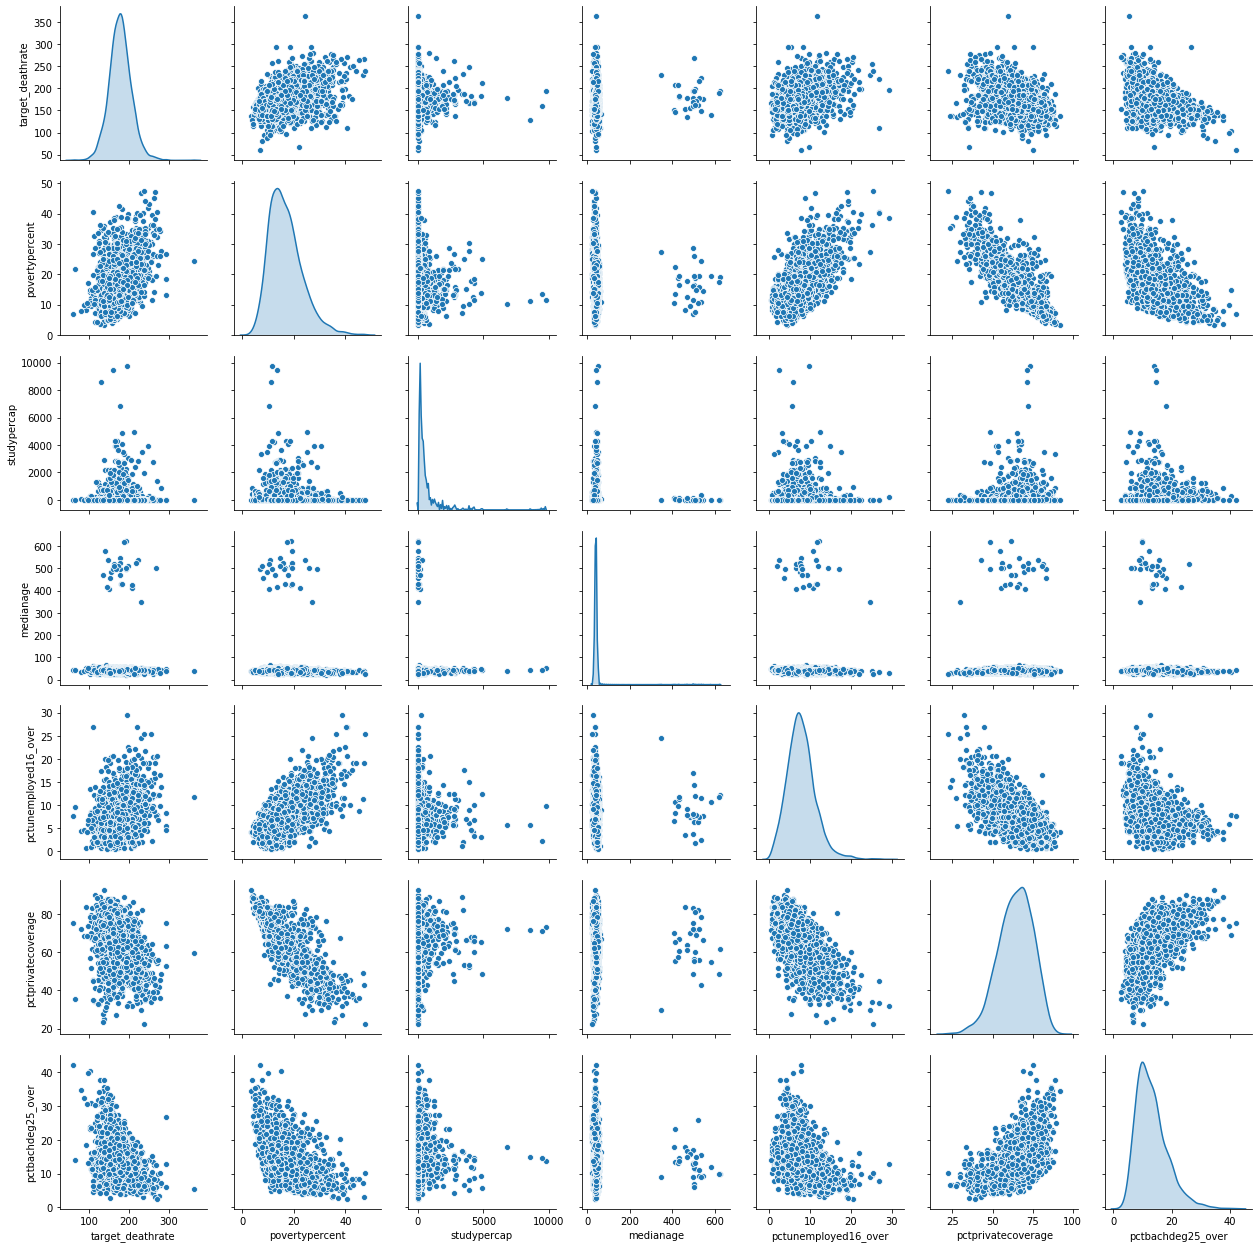

In [18]:
sns.pairplot(cancer_data, diag_kind = 'kde')
plt.show()

#### Corr

In [86]:
#x_variables = ['povertypercent', 'studypercap', 'medianage', 'pctunemployed16_over', 'pctprivatecoverage', 'pctbachdeg25_over']
y = cancer_data['target_deathrate']

from scipy.stats import pearsonr
for predictor in x_variables:
    x = cancer_data[predictor]
    corr_coef, p_value = pearsonr(x,y)
    print('Correlation Coefficient of y and: ',predictor,corr_coef )
    if (corr_coef < 0.05) and (corr_coef > -0.05):
            print(predictor,'has no linear relation with y')


Correlation Coefficient of y and:  povertypercent 0.42938898025645067
Correlation Coefficient of y and:  studypercap -0.02228501077237755
studypercap has no linear relation with y
Correlation Coefficient of y and:  medianage 0.00437507718124377
medianage has no linear relation with y
Correlation Coefficient of y and:  pctunemployed16_over 0.3784124421389392
Correlation Coefficient of y and:  pctprivatecoverage -0.38606550675387435
Correlation Coefficient of y and:  pctbachdeg25_over -0.48547731808774475


In [38]:
x_variables = ['povertypercent', 'pctunemployed16_over', 'pctprivatecoverage', 'pctbachdeg25_over']

#### least square, pred, R squred, p-value..

#### 1º povertypercent

In [54]:
x = cancer_data['povertypercent']
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[147.28305671]
 [  1.85926534]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     688.3
Date:                Fri, 01 May 2020   Prob (F-statistic):          5.90e-137
Time:                        11:33:11   Log-Likelihood:                -14139.
No. Observations:                3047   AIC:                         2.828e+04
Df Residuals:                    3045   BIC:                         2.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            147.2831      1.279    115.118      0.000     144.774     149.792
povertypercent     1.8593      0.071     26.236      0.000       1.720       1.998
==============================================================================
Omnibus:                      140.433   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.219
Skew:                          -0.144   Prob(JB):                     8.47e-95
Kurtosis:                       4.825   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

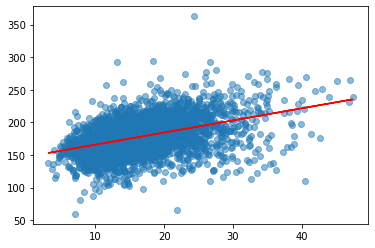

In [55]:
import statsmodels.api as sm
#x = cancer_data['povertypercent']
y = cancer_data['target_deathrate']

X     = sm.add_constant(x)
model = sm.OLS(y,X)

results = model.fit()
display(results.summary())

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_hat,'r')
plt.show()

#### 2º pctunemployed16_over

In [66]:
x = cancer_data['pctunemployed16_over']
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[154.77837782]
 [  3.04182773]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     508.9
Date:                Fri, 01 May 2020   Prob (F-statistic):          2.47e-104
Time:                        11:39:40   Log-Likelihood:                -14214.
No. Observations:                3047   AIC:                         2.843e+04
Df Residuals:                    3045   BIC:                         2.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  154.7784      1.157    133.822      0.000     152.511     157.046
pctunemployed16_over     3.0418      0.135     22.559      0.000       2.777       3.306
==============================================================================
Omnibus:                      147.285   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.456
Skew:                           0.139   Prob(JB):                    3.46e-104
Kurtosis:                       4.917   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

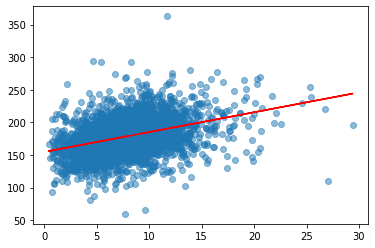

In [67]:
import statsmodels.api as sm
#x = cancer_data['pctunemployed16_over']
y = cancer_data['target_deathrate']

X     = sm.add_constant(x)
model = sm.OLS(y,X)

results = model.fit()
display(results.summary())

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_hat,'r')
plt.show()

#### 3º pctprivatecoverage

In [69]:
x = cancer_data['pctprivatecoverage']
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[243.42303663]
 [ -1.00627822]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     533.3
Date:                Fri, 01 May 2020   Prob (F-statistic):          7.15e-109
Time:                        11:39:55   Log-Likelihood:                -14203.
No. Observations:                3047   AIC:                         2.841e+04
Df Residuals:                    3045   BIC:                         2.842e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                243.4230      2.842     85.645      0.000     237.850     248.996
pctprivatecoverage    -1.0063      0.044    -23.094      0.000      -1.092      -0.921
==============================================================================
Omnibus:                      161.273   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.130
Skew:                          -0.155   Prob(JB):                    2.11e-120
Kurtosis:                       5.060   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

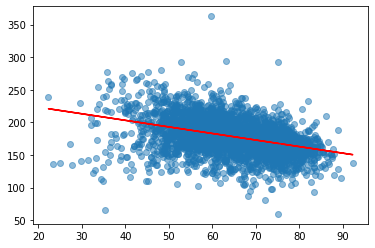

In [70]:
import statsmodels.api as sm
#x = cancer_data['pctprivatecoverage']
y = cancer_data['target_deathrate']

X     = sm.add_constant(x)
model = sm.OLS(y,X)

results = model.fit()
display(results.summary())

y_hat = results.predict(X)
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_hat,'r')
plt.show()

####  4º pctbachdeg25_over with the highest R^squared

In [72]:
x = cancer_data['pctbachdeg25_over']
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[211.83423647]
 [ -2.49737508]]


In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cancer_model = ols("target_deathrate ~ pctbachdeg25_over", data=cancer_data).fit()
cancer_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     939.0
Date:                Fri, 08 May 2020   Prob (F-statistic):          5.66e-180
Time:                        20:16:46   Log-Likelihood:                -14040.
No. Observations:                3047   AIC:                         2.808e+04
Df Residuals:                    3045   BIC:                         2.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           211.8342      1.168    181.312      0.000     209.543     214.125
pctbachdeg25_over    -2.4974      0.081    -30.643      0.000      -2.657      -2.338
==============================================================================
Omnibus:                      151.528   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.041
Skew:                           0.045   Prob(JB):                    5.99e-120
Kurtosis:                       5.078   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

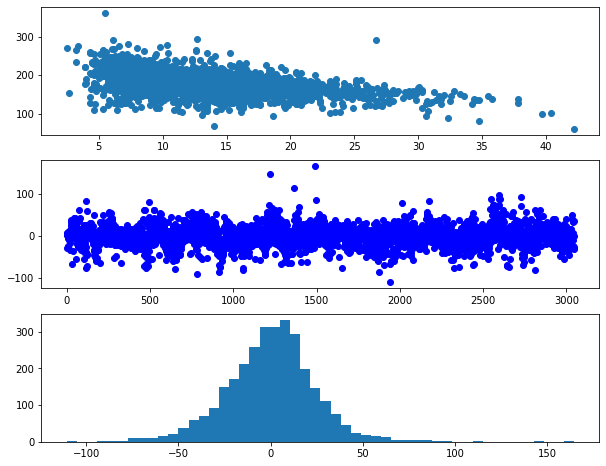

In [78]:
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.scatter(cancer_data.pctbachdeg25_over, cancer_data.target_deathrate)
#Se ve diferente al plot normal porque los ejes estam cambiados sin mas
plt.subplot(3,1,2)
plt.plot(cancer_model.resid,'bo')
plt.subplot(3,1,3)
plt.hist(cancer_model.resid, bins=50)
plt.show()

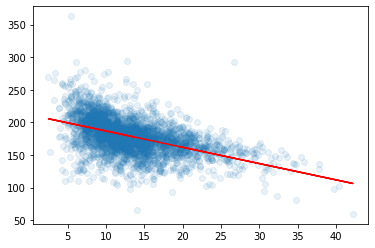

In [22]:
x = cancer_data.pctbachdeg25_over
y = cancer_data.target_deathrate
y_hat = cancer_model.predict(x)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()



### Exercise 2

In a 2015 [paper](https://www.sciencedirect.com/science/article/pii/S0040162514001656) comparing technological advancement of hybrid electric vehicles (HEV) in different market segments, authors Lim et al. collected data on prices and other features for 154 HEV models. The dataset is in the file `hybrid_reg.cs` and contains the following variables:
- *carid*: Vehicle ID
- *vehicle*: Make of vehicle
- *year*: Model year
- **msrp**: Manufacturer’s suggested retail price in 2013 (US dollars).
- *accelrate*: Acceleration rate in km/hour/second
- *mpg*: Fuel economy in miles/gallon
- *mpgmpge*: Max of mpg and mpge (mpge is miles per gallon equivalent for plug-in HEVs to take into account the all electric range)
- *carclass*: Model class. C = Compact, M = Midsize, TS = 2 Seater, L = Large, PT = Pickup Truck, MV = Minivan, SUV = Sport Utility Vehicle 
- *carclass_id*: Index representing model class

The variables `carid` and `vehicle` are vehicle identifiers and will not be used in the analysis. Likewise `carclass` will not be used as it is better to use the numerical form of the variable `carclass_id`.

<div class="alert alert-block alert-info">
Find the best predictor for <b>msrp</b> taking into account the above considerations
</div>

In [68]:
df = pd.read_csv('C:\\Users\\riul0\\Desktop\\Inference\\inference_prof\\inference\\data\hybrid_reg.csv',sep=',', decimal = '.', encoding='latin-1')
hybrid_data = df.drop(columns = ['carid','vehicle','carclass'])

features = ['msrp','year', 'mpg', 'accelrate', 'mpgmpge', 'carclass_id']



hybrid_data.head()

,year,msrp,accelrate,mpg,mpgmpge,carclass_id
0,1997,24509.74,7.46,41.26,41.26,1
1,2000,35354.97,8.20,54.10,54.10,1
2,2000,26832.25,7.97,45.23,45.23,1
3,2000,18936.41,9.52,53.00,53.00,7
4,2001,25833.38,7.04,47.04,47.04,1


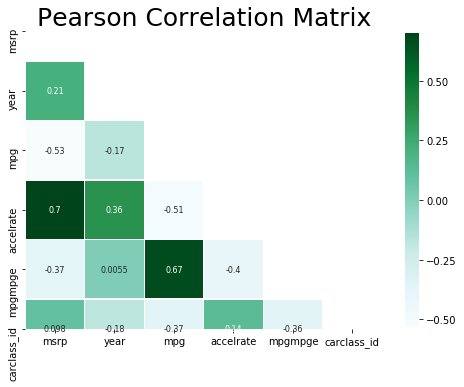

In [69]:
mask = np.zeros_like(hybrid_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(8, 6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(hybrid_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

#### Visuals

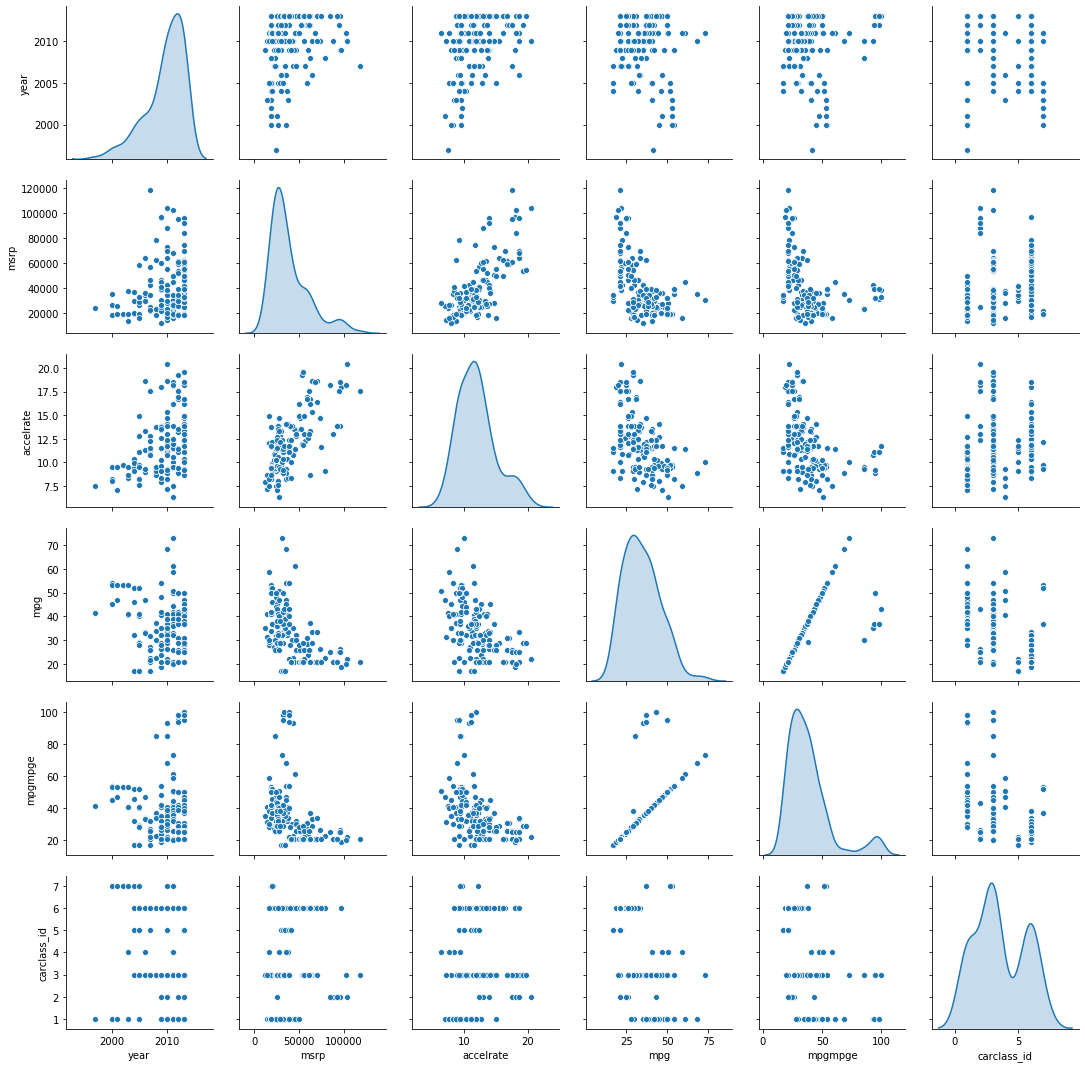

In [58]:
sns.pairplot(hybrid_data, diag_kind = 'kde')
plt.show()

#### Corr

In [59]:
x_variables = ['year', 'accelrate', 'mpgmpge', 'carclass_id','mpg']
y = hybrid_data['msrp']

from scipy.stats import pearsonr
for predictor in x_variables:
    x = hybrid_data[predictor]
    corr_coef, p_value = pearsonr(x,y)
    print('Correlation Coefficient of y and: ',predictor,corr_coef )
    if (corr_coef < 0.05) and (corr_coef > -0.05):
            print(predictor,'has no linear relation with y')
            
# x_variables th same

Correlation Coefficient of y and:  year 0.20978572755911537
Correlation Coefficient of y and:  accelrate 0.6955778996913979
Correlation Coefficient of y and:  mpgmpge -0.3722185475839691
Correlation Coefficient of y and:  carclass_id 0.09781452253550738
Correlation Coefficient of y and:  mpg -0.5318263633683786


#### least square, pred, R squred, p-value..

In [60]:
x = hybrid_data['accelrate']
n = x.shape[0]

X = np.matrix([np.ones(n), x]).T
y = np.matrix(y).T

# Solve least-squares
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta_hat)

[[-21282.1740687 ]
 [  5067.66110596]]


In [73]:
x = hybrid_data['accelrate']
y = hybrid_data['msrp']

import statsmodels.api as sm
from statsmodels.formula.api import ols

hybrid_data = ols("msrp ~ accelrate", data=hybrid_data).fit()
hybrid_data.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.92e-23
Time:                        19:44:37   Log-Likelihood:                -1691.7
No. Observations:                 153   AIC:                             3387.
Df Residuals:                     151   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.128e+04   5244.588     -4.058      0.000   -3.16e+04   -1.09e+04
accelrate   5067.6611    425.961     11.897      0.000    4226.047    5909.275
==============================================================================
Omnibus:                       32.737   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.692
Skew:                           1.072   Prob(JB):                     3.61e-12
Kurtosis:                       4.915   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
plt.figure(figsize=(10,8))

x = hybrid_data['accelrate']
y = hybrid_data['msrp']


plt.subplot(3,1,1)
plt.scatter(x,y)
plt.subplot(3,1,2)
plt.plot(hybrid_data.resid,'bo')
plt.subplot(3,1,3)
plt.hist(hybrid_data.resid, bins=50)
plt.show()

TypeError: 'RegressionResultsWrapper' object is not subscriptable

<Figure size 720x576 with 0 Axes>

In [75]:
x = hybrid_data['accelrate']
y = hybrid_data['msrp']

y_hat = hybrid_data.predict(x)
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_hat,'r')
plt.show()

TypeError: 'RegressionResultsWrapper' object is not subscriptable